# Q* Learning - FrozenLake
<br> 
In this Notebook, we'll implement an agent <b>that plays FrozenLake.</b>
<img src="https://www.gymlibrary.ml/_images/frozen_lake.gif" alt="Frozen Lake"/>

The goal of this game is <b>to go from the starting state (S) to the goal state (G)</b> by walking only on frozen tiles (F) and avoid holes (H).However, the ice is slippery, <b>so you won't always move in the direction you intend (stochastic environment)</b>


Reference: code adapted from 
https://github.com/simoninithomas/Deep_reinforcement_learning_Course/blob/master/Q%20learning/FrozenLake/Q%20Learning%20with%20FrozenLake.ipynb

In [1]:
#!pip install gym
#!pip install pygame
#!pip install gym[toy_text]

In [2]:
import numpy as np
import gym #to load the FrozenLake Environment
import random
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
#env = gym.make("FrozenLake-v0")#this command creates the FrozenLake environment using the gym library of environments
#is_slippery=False
env = gym.make("FrozenLake-v1")

In [4]:
env.reward_range
env.metadata
env.spec
env.action_space.contains(2)
#env.desc

True

In [5]:
env.reset()

0

## Step 2: Create the Q-table and initialize it 

In [6]:
action_size = env.action_space.n#how many actions there are
state_size = env.observation_space.n#how many states there are
qtable = np.zeros((state_size, action_size))
print(qtable)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


## Set the hyperparameters

In [7]:
total_episodes = 5000      # Total episodes
learning_rate = 0.8           # Learning rate
max_steps = 99                # Max steps per episode
gamma_rate = 0.95                  # Discounting rate

# Exploration parameters
epsilon = 1.0                 # Exploration rate
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.01            # Minimum exploration probability 
decay_rate = 0.005             # Exponential decay rate for exploration prob

## Step 4: The Q learning algorithm
- Now we implement the Q learning algorithm:
<img src="https://github.com/simoninithomas/Deep_reinforcement_learning_Course/blob/master/Q%20learning/FrozenLake/qtable_algo.png?raw=1" alt="Q algo"/>

In [8]:
# List of rewards
rewards = []

for episode in tqdm(range(total_episodes)):
    # Reset the environment
    state = env.reset()
    step = 0
    done = False
    total_rewards = 0
    
    for step in range(max_steps):
        # epsilon-greedy strategy
        exploration_or_exploitation = random.uniform(0, 1)
        
        ## If this number > greater than epsilon --> exploitation (taking the biggest Q value for this state)
        if exploration_or_exploitation > epsilon:
            action = np.argmax(qtable[state,:])

        # Else doing a random choice --> exploration
        else:
            action = env.action_space.sample()

        # Take the action (a) and observe the outcome state(s') and reward (r)
        new_state, reward, done, info = env.step(action)

        # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
        # qtable[new_state,:] : all the actions we can take from new state
        qtable[state, action] = qtable[state, action] + learning_rate * (reward + gamma_rate * np.max(qtable[new_state, :]) - qtable[state, action])
        
        total_rewards += reward
        
        # Our new state is state
        state = new_state
        
        # If done (if we're dead) : finish episode
        if done == True: 
            break
        
    # Schedule to reduce epsilon
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode) 
    rewards.append(total_rewards)

print ("Score over time: " +  str(sum(rewards)/total_episodes))
print(qtable)

100%|█████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:05<00:00, 856.62it/s]

Score over time: 0.4464
[[2.93690197e-01 4.17009083e-02 2.66526635e-02 4.23411335e-02]
 [1.63031844e-03 1.58904087e-03 2.28960400e-03 2.19689125e-02]
 [8.07620316e-03 2.66153201e-03 2.44085716e-03 1.61671697e-02]
 [8.29981094e-04 7.66724142e-03 1.35268845e-03 1.65317517e-02]
 [4.46389756e-01 8.54850873e-02 1.78091152e-02 3.24952267e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.80963679e-06 9.27514159e-06 9.50504640e-04 5.46247788e-06]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.39723575e-02 3.04546467e-03 3.27370061e-03 5.87932190e-01]
 [4.92284631e-03 7.60617938e-01 2.24729870e-03 6.54957584e-03]
 [7.77475361e-01 1.81423007e-04 1.24948254e-03 3.46570375e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.88326368e-02 9.77606167e-02 7.64355943e-01 6.55707226e-02]
 [2.22432252e-01 9.60947293e-01 2.99794641e-01 2.32450956e-01]
 [0.00000000e+00 0.00000000e+00

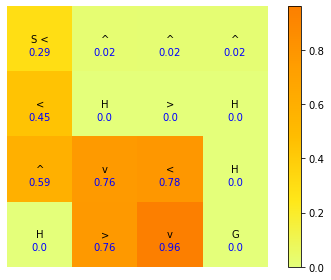

In [9]:
# visualisation de la table Q pour FrozenLake 
def plotQ(q_table,env):
  MAP=env.desc
  map_size=MAP.shape[0]
  best_value = np.max(q_table, axis = 1).reshape((map_size,map_size))
  best_policy = np.argmax(q_table, axis = 1).reshape((map_size,map_size))
    
  fig, ax = plt.subplots()
  im = ax.imshow(best_value,cmap=plt.cm.Wistia)#Pastel1, spring, autumn
  arrow_list=['<','v','>','^']
  for i in range(best_value.shape[0]):
      for j in range(best_value.shape[1]):
          if MAP[i][j].decode('utf-8') in 'GH':#terminal states
            arrow = MAP[i][j].decode('utf-8')
          else :
            arrow=arrow_list[best_policy[i, j]]
          if MAP[i][j].decode('utf-8') in 'S':
              arrow = 'S ' + arrow
          text = ax.text(j, i, arrow, ha = "center", va = "center",
                         color = "black")
          text2 = ax.text(j, i+0.2, str(np.round(best_value[i,j],2)), 
                          ha = "center", va = "center",color = "blue")
          
            
  cbar = ax.figure.colorbar(im, ax = ax)
  plt.axis('off')  
  fig.tight_layout()
  plt.show() 
plotQ(qtable,env)

In [10]:
#print(qtable)
#np.max(qtable, axis = 1).reshape((4,4))
#look at https://gsverhoeven.github.io/post/frozenlake-qlearning-convergence/ for the optimal value function

## Step 5: Use the Q-table to play FrozenLake
- After 10 000 episodes, our Q-table can be used as a "cheatsheet" to play FrozenLake"
- By running this cell you can see our agent playing FrozenLake.

In [11]:
env.reset()
rewards = []
total_test_episodes=10

for episode in range(total_test_episodes):
    state = env.reset()
    step = 0
    done = False
    total_rewards = 0

    print("****************************************************")
    print("EPISODE ", episode)

    for step in range(max_steps):
        
        # Take the action (index) that have the maximum expected future reward given that state
        action = np.argmax(qtable[state,:])
        #env.render()
        new_state, reward, done, info = env.step(action)
        total_rewards +=reward        
        if done:
            # Here, we decide to only print the last state (to see if our agent is on the goal or fall into an hole)
            env.render()
            
            # We print the number of step it took.
            print("Number of steps", step)
            break
        state = new_state
    rewards.append(total_rewards)

print ("Score over time: " +  str(sum(rewards)/total_test_episodes))

env.close()

****************************************************
EPISODE  0
Number of steps 14
****************************************************
EPISODE  1
Number of steps 21
****************************************************
EPISODE  2
Number of steps 17
****************************************************
EPISODE  3
****************************************************
EPISODE  4
****************************************************
EPISODE  5
Number of steps 28
****************************************************
EPISODE  6
Number of steps 14
****************************************************
EPISODE  7
Number of steps 26
****************************************************
EPISODE  8
Number of steps 48
****************************************************
EPISODE  9
Number of steps 63
Score over time: 0.7


##Questions

- is the obtained value function optimal ?
- is the obtained policy optimal ?
- when $\gamma$ goes to $1.0$ do the policy changes ? 
- change the total number of training episodes 
- implement Double Q-learning ...
